In [65]:
import os                                               # to set current working directory 
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                        # plotting

import seaborn as sns 
import seaborn 
from matplotlib import gridspec

In [66]:
this_section= 'section_UDC'
my_path = "D:/03_third paper on floodplain cycles/01_YW_HA_panel/1D_logs/"
os.chdir(my_path)

df = pd.read_csv("UDC_long_section_add A-H_2.csv",sep=";")   

df

,Cycle ID,Thickness
0,-6,6.0218
1,-5,7.7774
2,-4,9.7140
3,-3,4.9246
4,-2,8.0084
5,-1,3.7537
6,A,6.0692
7,B,10.2099
8,C,6.3629
9,D,8.5347


In [67]:
df.describe()

,Thickness
count,44.000000
mean,6.826611
std,2.025507
min,3.424500
25%,5.498300
50%,6.445700
75%,7.827700
max,12.462400


cycle ID = 

300.3709


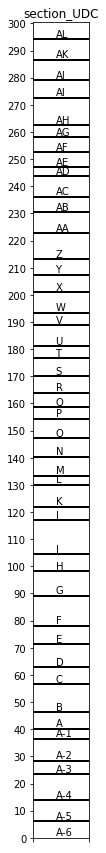

In [68]:
fig, ax = plt.subplots(figsize=(1,15))
plt.subplot(111)  
cycle_id = ['A-6','A-5','A-4','A-3','A-2','A-1','A','B','C','D','E','F','G','H',
    'I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH',
            'AI','AJ','AK','AL','AM']
for i in range(1,len(df['Thickness'])):
    plt.axhline(df['Thickness'][0:i].sum(),xmin=0, xmax=1, linewidth=2, color = 'k')
    plt.text(0.4,df['Thickness'][0:i].sum()+0.8,cycle_id[i])

plt.text(0.4,df['Thickness'][0:0].sum()+0.8,'A-6')
#plt.text(0.4,df['Thickness'].sum()+0.8,'AN')
plt.ylim(0,df['Thickness'].sum())
print(df['Thickness'].sum())
#plt.ylim(0,300)
plt.title(this_section)
plt.xticks(fontsize = 0)
plt.yticks(np.arange(0,df['Thickness'].sum(),10))
my_file = 'column' + this_section
fig.savefig(os.path.join(my_path,my_file+'_eps'),bbox_inches='tight',dpi=400,format='eps')
fig.savefig(os.path.join(my_path,my_file+'_2'),bbox_inches='tight',dpi=400) 


In [69]:
df['Thickness'].max()

12.4624

Text(0.2, 1, 'N = 44')

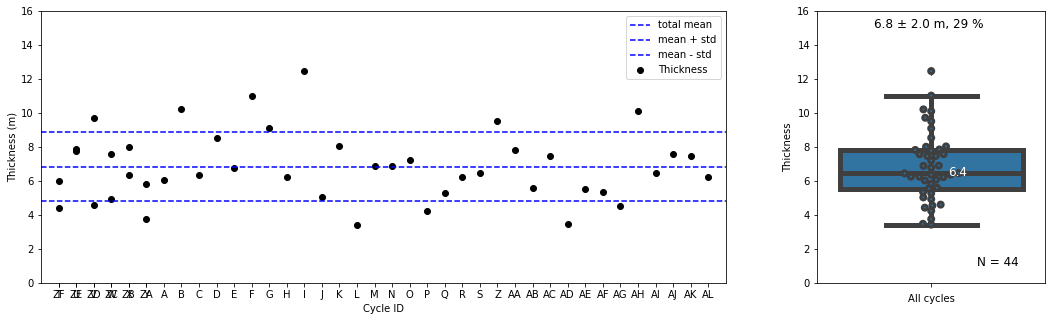

In [89]:
fig, ax = plt.subplots(figsize=(18,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
plt.scatter(df['Cycle ID'],df['Thickness'],color='k',linestyle = '-',label='Thickness')
#plt.plot(df['Thickness'].expanding(min_periods=2).mean(),color='r',linestyle = '-',label='expanding mean',linewidth=2)
plt.axhline(df['Thickness'].mean(),color='b',linestyle = '--',label='total mean')
plt.axhline(df['Thickness'].mean()+df['Thickness'].std(),color='b', linestyle='--',label='mean + std')
plt.axhline(df['Thickness'].mean()-df['Thickness'].std(),color='b', linestyle='--',label='mean - std')
#plt.title(this_section)
plt.legend()
plt.xlim(-1,38)
plt.ylim(0,16)
plt.xlabel ('Cycle ID')
plt.ylabel ('Thickness (m)')
plt.xticks(df['Cycle ID'],['ZF','ZE','ZD','ZC','ZB','ZA','A','B','C','D','E','F','G','H',
    'I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH',
            'AI','AJ','AK','AL','AM'])
ax1 = plt.subplot(gs[1])
sns.swarmplot(y = df['Thickness'],linewidth=3)
vplot=sns.boxplot(y = df['Thickness'], linewidth=5)
#?vplot=sns.boxplot(y = df['Thickness'], linewidth=5)

plt.ylim(0,16)
plt.xlabel ('All cycles')
#plt.ylabel ('Thickness (m)')
ax1.text(-0.25, 15, '%.1f ± %.1f m, %.0f %%'%(np.mean(df['Thickness']),np.std(df['Thickness']),
                                          np.std(df['Thickness'])/np.mean(df['Thickness'])*100),fontsize = 12)
ax1.text(0.075, np.median(df['Thickness'])*0.98, '%.1f'%(np.median(df['Thickness'])),fontsize = 12,color='white')
ax1.text(0.2, 1, 'N = %.0f'%(len(df['Thickness'])),fontsize = 12)